In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt


curr_path = os.getcwd()
output_folder = curr_path + "/"+'HSV'  # 출력 폴더 경로

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

video_list = os.listdir()
video_list = [ x for x in video_list if x.endswith(".mp4") ]

print(video_list)

['1.mp4', '10.mp4', '11.mp4', '12.mp4', '13.mp4', '14.mp4', '15.mp4', '16.mp4', '17.mp4', '18.mp4', '19.mp4', '2.mp4', '20.mp4', '3.mp4', '4.mp4', '5.mp4', '6.mp4', '7.mp4', '8.mp4', '9.mp4']


In [18]:
for filename in video_list:
    cap = cv2.VideoCapture(os.path.join(curr_path, filename))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if frame_count < 3600:
        print(f"Skipping {filename}, not enough frames.")
        continue
    print(f"Processing {filename}...")

    v_values = []
    for i in range(3600):
        ret, frame = cap.read()

        if not ret:
            print(f"Error reading {filename} at frame {i}.")
            break

        frame = cv2.resize(frame, (256, 256))
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        v = hsv_frame[..., 2]
        v_values.append(v)

        if i % 100 == 0:
            print(f"Processed {i} frames...")
    output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_v_values.npy")
    np.save(output_path, np.array(v_values))
    print(f"Saved V values to {output_path}.")
    cap.release()


Processing 1.mp4...
Processed 0 frames...
Processed 100 frames...
Processed 200 frames...
Processed 300 frames...
Processed 400 frames...
Processed 500 frames...
Processed 600 frames...
Processed 700 frames...
Processed 800 frames...
Processed 900 frames...
Processed 1000 frames...
Processed 1100 frames...
Processed 1200 frames...
Processed 1300 frames...
Processed 1400 frames...
Processed 1500 frames...
Processed 1600 frames...
Processed 1700 frames...
Processed 1800 frames...
Processed 1900 frames...
Processed 2000 frames...
Processed 2100 frames...
Processed 2200 frames...
Processed 2300 frames...
Processed 2400 frames...
Processed 2500 frames...
Processed 2600 frames...
Processed 2700 frames...
Processed 2800 frames...
Processed 2900 frames...
Processed 3000 frames...
Processed 3100 frames...
Processed 3200 frames...
Processed 3300 frames...
Processed 3400 frames...
Processed 3500 frames...
Saved V values to c:\Users\adam\Desktop\video_data/HSV\1_v_values.npy.
Processing 10.mp4...


In [2]:
data_dir  = os.getcwd( ) +"/HSV"
file_list = os.listdir(data_dir)
file_list = [ int(x.split("_")[0]) for x in file_list ]
file_list.sort()

mean_list = []
for file in file_list : 
    file = str(file) +"_v_values.npy"
    arr = np.load( os.path.join(data_dir, file)).astype(float)
    mean_list.append(arr.sum())
    
print(mean_list)


[35235850452.0, 32497763536.0, 23014130447.0, 23452634394.0, 33794773905.0, 11024197740.0, 9863277405.0, 22743164024.0, 8245121764.0, 7552764435.0, 18299887684.0, 17325663933.0, 14126343958.0, 22796631011.0, 23294152738.0, 4500438256.0, 4475880495.0, 2267260543.0, 2841301936.0, 4784837057.0]


([<matplotlib.axis.XTick at 0x180b556c910>,
 [Text(2, 0, 'HMHB'),
  Text(7, 0, 'HMLB'),
  Text(12, 0, 'LMHB'),
  Text(17, 0, 'LMLB')])

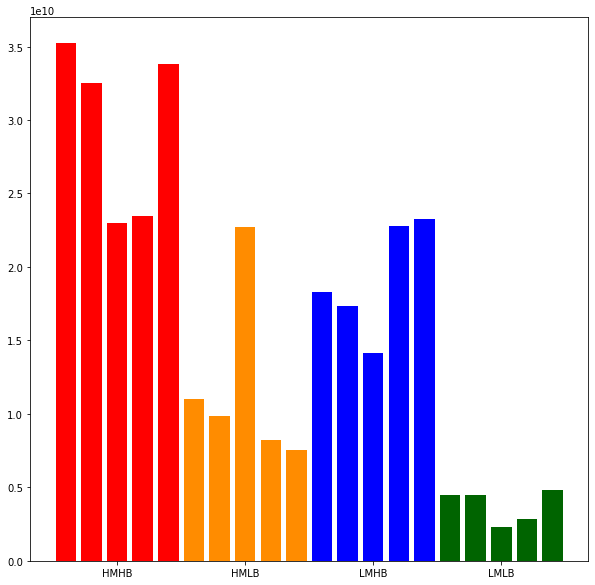

In [3]:
fig = plt.figure(figsize=(10,10))

plt.bar( range(len(mean_list)), mean_list, color=np.repeat(["r","darkorange","b","darkgreen"], 5))
plt.xticks( [2,7,12,17] , ["HMHB","HMLB","LMHB","LMLB"])